In [174]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import rosbag

# from geometry_msgs.msg import Point, Quaternion, Vector3
# from snapstack_msgs.msg import State, Goal, AttitudeCommand, ControlLog, QuadFlightMode

plt.rcParams.update({'font.size': 24})

In [175]:
# SIM
# filename_coml = 'sim/coml_figure_eight_wind_0.bag'
# filename_pid = 'sim/pid_figure_eight_wind_0.bag'

filename_coml = 'sim/coml_circle_wind_0.bag'
# filename_pid = 'sim/pid_circle_wind_0.bag'

# filename_pid = 'sim/pid_figure_eight_wind_10.bag'
# filename_coml = 'sim/coml_figure_eight_wind_10.bag'

# filename_coml = 'sim/coml_circle_wind_10.bag'
# filename_pid = 'sim/pid_circle_wind_10.bag'

# filename_coml = 'sim/coml_circle_wind_sine.bag'
# filename_pid = 'sim/pid_circle_wind_sine.bag'

# filename_coml = 'sim/coml_figure_eight_wind_sine.bag'
# filename_pid = 'sim/pid_figure_eight_wind_sine.bag'

# REAL

filename_pid = 'real/real_coml_no_wind.bag'
# filename_pid = 'real/real_pid_no_wind.bag'

# filename_coml = 'real/real_coml_low_wind_30s.bag'
# filename_pid = 'real/real_pid_low_wind_30s.bag'

# filename_coml = 'real/real_coml_medium_wind_30s.bag'
# filename_pid = 'real/real_pid_medium_wind_30s.bag'

# filename_coml = 'real/real_coml_high_wind_30s.bag'
# filename_pid = 'real/real_pid_high_wind_30s.bag'

b_coml = bagreader(f'../rosbags/{filename_coml}')
b_pid = bagreader(f'../rosbags/{filename_pid}')

# replace the topic name as per your need
topic_log_coml = b_coml.message_by_topic('/HX14s/log')
topic_log_pid = b_pid.message_by_topic('/HX14s/log')

# topic_log_coml = b_coml.message_by_topic('/HX14/log')
# topic_log_pid = b_pid.message_by_topic('/HX14/log')

df_log_coml = pd.read_csv(topic_log_coml)
df_log_pid = pd.read_csv(topic_log_pid)

[INFO]  Data folder ../rosbags/sim/coml_circle_wind_0 already exists. Not creating.
[INFO]  Data folder ../rosbags/sim/pid_circle_wind_0 already exists. Not creating.


In [176]:
coml_start_i = df_log_coml[df_log_coml['p_ref.x'] < 2].index[0] - 1
try:
    coml_end_i = df_log_coml[df_log_coml['p_ref.z'] > df_log_coml['p_ref.z'][0]].index[0] - 1
except:
    coml_end_i = len(df_log_coml['p_ref.z'])

pid_start_i = df_log_pid[df_log_pid['p_ref.x'] < 2].index[0] - 1
try:
    pid_end_i = df_log_pid[df_log_pid['p_ref.z'] > df_log_pid['p_ref.z'][0]].index[0] - 1
except:
    pid_end_i = len(df_log_pid['p_ref.z'])

df_log_coml_truncate = df_log_coml.truncate(before=coml_start_i, after=coml_end_i)
df_log_pid_truncate = df_log_pid.truncate(before=pid_start_i, after=pid_end_i)


In [177]:
def avg_tracking_error(df_log):
    err_x = df_log['p_err.x'].to_numpy()
    err_y = df_log['p_err.y'].to_numpy()
    err_z = df_log['p_err.z'].to_numpy()
    total_err = np.vstack((err_x, err_y, err_z)).T # T x 3
    avg_tracking_error = np.mean(np.linalg.norm(total_err, axis=1))

    return avg_tracking_error

coml_tracking_error = avg_tracking_error(df_log_coml_truncate)
print('coml tracking error = ', coml_tracking_error)
pid_tracking_error = avg_tracking_error(df_log_pid_truncate)
print('pid tracking error = ', pid_tracking_error)


coml tracking error =  0.07310797522983586
pid tracking error =  0.06927121159118287


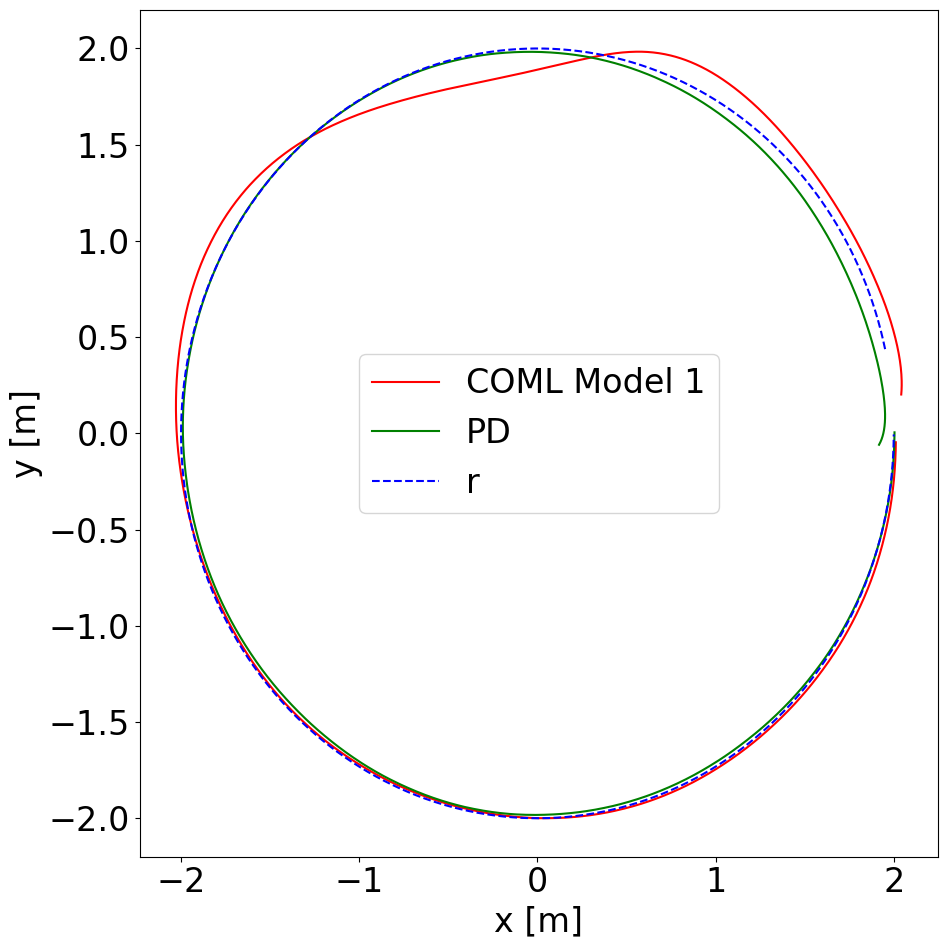

In [178]:
def plot(df_log_coml, df_log_pid, square=False):
    # Parametric
    if square:
        plt.figure(figsize=(10, 10))
    else:
        plt.figure(figsize=(30, 10))

    plt.plot(df_log_coml['p.x'], df_log_coml['p.y'], 'r-', label='COML Model 1')
    plt.plot(df_log_pid['p.x'], df_log_pid['p.y'], 'g-', label='PD')
    plt.plot(df_log_coml['p_ref.x'], df_log_coml['p_ref.y'], 'b--', label='r')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    
    plt.legend()
    # plt.title('Parametric Position')
    plt.tight_layout()
    plt.show()

plot(df_log_coml_truncate, df_log_pid_truncate, True)
# plot(df_log_coml, df_log_pid, False)

